In [1]:
from netCDF4 import Dataset
import numpy as np
#import pymeteo.skewt as skewt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = 'wrfout_d01_2012-05-30_00:00:00.nc'

In [3]:
nc = Dataset(file, 'r')

In [4]:
for i in nc.variables:
    print(i, nc.variables[i].shape)

Times (97, 19)
XLAT (97, 29, 29)
XLONG (97, 29, 29)
LU_INDEX (97, 29, 29)
ZNU (97, 59)
ZNW (97, 60)
ZS (97, 4)
DZS (97, 4)
VAR_SSO (97, 29, 29)
U (97, 59, 29, 30)
V (97, 59, 30, 29)
W (97, 60, 29, 29)
PH (97, 60, 29, 29)
PHB (97, 60, 29, 29)
T (97, 59, 29, 29)
HFX_FORCE (97,)
LH_FORCE (97,)
TSK_FORCE (97,)
HFX_FORCE_TEND (97,)
LH_FORCE_TEND (97,)
TSK_FORCE_TEND (97,)
MU (97, 29, 29)
MUB (97, 29, 29)
NEST_POS (97, 29, 29)
P (97, 59, 29, 29)
PB (97, 59, 29, 29)
FNM (97, 59)
FNP (97, 59)
RDNW (97, 59)
RDN (97, 59)
DNW (97, 59)
DN (97, 59)
CFN (97,)
CFN1 (97,)
THIS_IS_AN_IDEAL_RUN (97,)
P_HYD (97, 59, 29, 29)
Q2 (97, 29, 29)
T2 (97, 29, 29)
TH2 (97, 29, 29)
PSFC (97, 29, 29)
U10 (97, 29, 29)
V10 (97, 29, 29)
RDX (97,)
RDY (97,)
RESM (97,)
ZETATOP (97,)
CF1 (97,)
CF2 (97,)
CF3 (97,)
ITIMESTEP (97,)
XTIME (97,)
QVAPOR (97, 59, 29, 29)
QCLOUD (97, 59, 29, 29)
QRAIN (97, 59, 29, 29)
QICE (97, 59, 29, 29)
QSNOW (97, 59, 29, 29)
QGRAUP (97, 59, 29, 29)
QHAIL (97, 59, 29, 29)
QNCLOUD (97, 59, 29,

In [5]:
T = nc.variables['T']

In [6]:
xlong = nc.variables['XLONG']

In [7]:
xlat = nc.variables['XLAT']

In [8]:
xlat.shape

(97, 29, 29)

In [9]:
T.shape

(97, 59, 29, 29)

In [10]:
P = nc.variables['P']
P.shape

(97, 59, 29, 29)

In [11]:
len(T[3, :, 2, 2])

59

In [12]:
for dim in nc.dimensions:
    print(dim, nc.dimensions[dim])

Time <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 97

DateStrLen <class 'netCDF4._netCDF4.Dimension'>: name = 'DateStrLen', size = 19

west_east <class 'netCDF4._netCDF4.Dimension'>: name = 'west_east', size = 29

south_north <class 'netCDF4._netCDF4.Dimension'>: name = 'south_north', size = 29

bottom_top <class 'netCDF4._netCDF4.Dimension'>: name = 'bottom_top', size = 59

bottom_top_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'bottom_top_stag', size = 60

soil_layers_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'soil_layers_stag', size = 4

west_east_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'west_east_stag', size = 30

south_north_stag <class 'netCDF4._netCDF4.Dimension'>: name = 'south_north_stag', size = 30



In [13]:
xlong[1,5,5]

-100.07627

## Calcular altura

`Z = (PH + PBH)/9.8`

# Richardson method

$$Ri(z_{i+1}) = \frac{g}{T_s} \frac{(\theta_{i+2} - \theta_i)(z_{i+2} - z_i)}{(V_{i+2} - V_i)^2}$$

# Parámetros

- $g = 9.8 \ m/s^2$

In [14]:
nc.variables['U']

<class 'netCDF4._netCDF4.Variable'>
float32 U(Time, bottom_top, south_north, west_east_stag)
    FieldType: 104
    MemoryOrder: XYZ
    description: x-wind component
    units: m s-1
    stagger: X
    coordinates: XLONG_U XLAT_U XTIME
unlimited dimensions: Time
current shape = (97, 59, 29, 30)
filling off

In [15]:
g = 9.8

In [27]:
g = 9.8
T = nc.variables['T']
u = nc.variables['U']
v = nc.variables['V']
T2 = nc.variables['T2']
PH = nc.variables['PH']
PHB = nc.variables['PHB']

In [28]:
PH.shape

(97, 60, 29, 29)

In [29]:
PHB[:].shape

(97, 60, 29, 29)

## Interpolación numpy (no está chido)

In [30]:
xlat = nc.variables['XLAT']
xlong = nc.variables['XLONG']

xlat_u = nc.variables['XLAT_U']
xlong_u = nc.variables['XLONG_U']

xlat_v = nc.variables['XLAT_V']
xlong_v = nc.variables['XLONG_V']

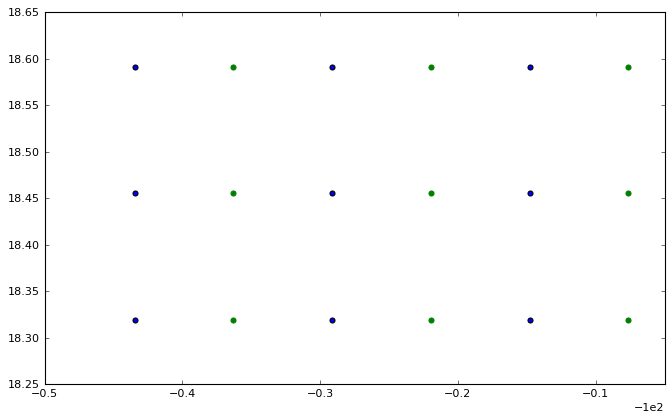

In [110]:
plt.figure(figsize=(10,6))
range_x = range(3,6)
plt.scatter(xlong_u[0,range_x, range_x], xlat_u[0, range_x, range_x])
#plt.scatter(xlong_v[0,range_x, range_x], xlat_v[0, range_x, range_x], color = 'r')
plt.scatter(xlong[0,range_x, range_x], xlat[0, range_x, range_x], color = 'g')

In [111]:
xlat_u[0, 3, 3:6]

array([ 18.31952667,  18.31952667,  18.31952667], dtype=float32)

In [112]:
u = nc.variables['U']

In [113]:
u[0, 10, 3, 3:6]

array([ 0.65301877,  1.08331299,  1.7920413 ], dtype=float32)

In [114]:
u_interp = np.interp(xlong[0, 3, :], xlong_u[0, 3, :], u[0, 10, 3, :])

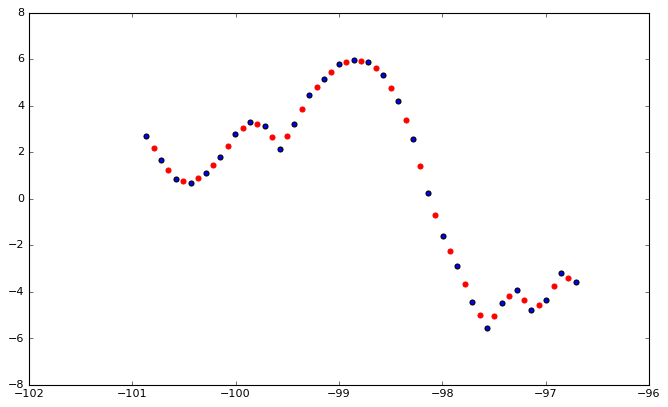

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(xlong_u[0, 3, :], u[0, 10, 3, :])

plt.scatter(xlong[0, 3, :], u_interp, color='r')


In [135]:
u.shape

(97, 59, 29, 30)

In [159]:
YY = u[:]

In [169]:
u.shape

(97, 59, 29, 30)

In [164]:
YY[0,0,0,:] = np.zeros(30)

In [168]:
YY.shape

(97, 59, 29, 30)

In [177]:
a,b,c,d = u.shape

In [179]:
d

30

In [184]:
len(u[0,0,0,:])

30

In [192]:
np.interp(xlong[0,0,:], xlong_u[0,0,:], u[0, 3, 0, :]).shape

(29,)

In [197]:
u.shape

(97, 59, 29, 30)

In [198]:
xlong.shape

(97, 29, 29)

In [201]:
type(u[0,0,0,0])

numpy.float32

In [204]:
np.zeros((3,3,3), np.float32)

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]], dtype=float32)

In [205]:
u.shape

(97, 59, 29, 30)

In [210]:
np.zeros((97, 59, 29, 30)).shape

(97, 59, 29, 30)

In [106]:
'''
    No sirve.
'''
def u_interpolate(XLONG, XLONG_U, U):
    
    tf, h, y, x = U.shape
    
    U_intep = np.zeros((tf, h, y, x-1), np.float32)
    
    #U_intep = np.zeros_like(U)
    
    for t in range(0,tf-1):
        for z in range(0, h-1):
            for i in range(0, y-1):
            
                U_intep[t, z, i, :] = np.interp(XLONG[t, i, :], XLONG_U[t, i, :], U[t, z, i, :])
                
    return U_intep

In [107]:
u[]

SyntaxError: invalid syntax (<ipython-input-107-49ddf1971ced>, line 1)

In [108]:
u_interpol = u_interpolate(xlong, xlong_u, u)

In [216]:
import time

start = time.time()
u_interpol = u_interpolate(xlong, xlong_u, u)
end = time.time()
print(end - start)

82.18119215965271


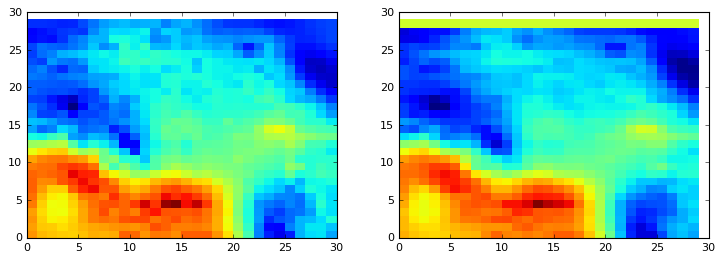

In [129]:
h = 0
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(221)
ax1.pcolor(u[0,h, :, :])

ax2 = fig.add_subplot(222)
ax2.pcolor(u_interpol[0,h, :, :])



In [123]:
relieve = nc.variables['HGT']

In [124]:
relieve.shape

(97, 29, 29)

In [128]:
relieve[1,:, 1]

array([ 1201.0769043 ,   786.41149902,   501.50646973,   355.52093506,
         363.50344849,   464.41571045,   592.55273438,   666.22753906,
         646.8795166 ,   633.70812988,   915.29205322,  1655.40100098,
        2250.65917969,  2452.46142578,  2518.13330078,  2242.66235352,
        1992.06530762,  2094.5546875 ,  2063.5456543 ,  1892.87097168,
        1913.14404297,  2054.97363281,  2109.85742188,  2060.0078125 ,
        2010.70446777,  2036.47180176,  2112.48388672,  2059.28613281,
        1909.19750977], dtype=float32)

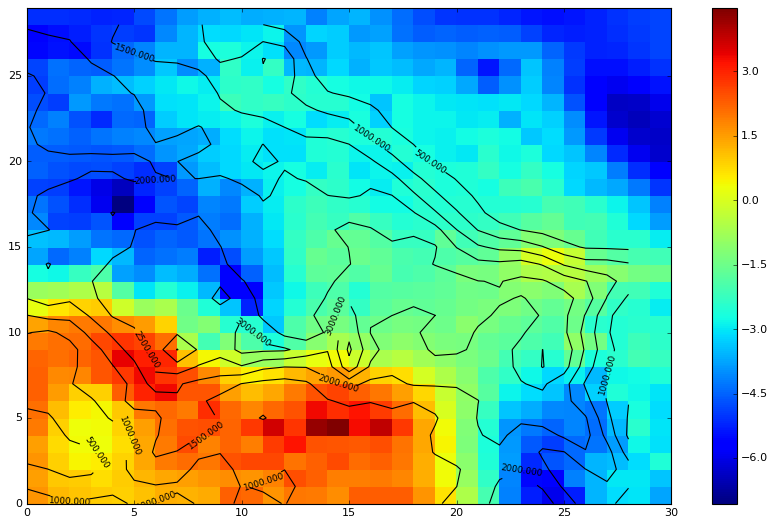

In [156]:
h = 0
fig = plt.figure(figsize=(13,8))
Cs = plt.contour(relieve[1, :, :], colors= 'k')
plt.clabel(Cs, fontsize = 8)
plt.pcolor(u[0,h, :, :])
plt.colorbar()

## interpolate.interp2d

In [20]:
import scipy.interpolate as interpolate
#import xarray as xr

In [31]:
ref_lat = np.linspace(-90,89,180)
ref_lon = np.linspace(0,359,360)

In [32]:
ref_grid = xr.DataArray(np.zeros((180,360)),coords=[('lat',ref_lat),('lon',ref_lon)])

In [33]:
ref_grid.lat

<xarray.DataArray 'lat' (lat: 180)>
array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80., -79.,
       -78., -77., -76., -75., -74., -73., -72., -71., -70., -69., -68., -67.,
       -66., -65., -64., -63., -62., -61., -60., -59., -58., -57., -56., -55.,
       -54., -53., -52., -51., -50., -49., -48., -47., -46., -45., -44., -43.,
       -42., -41., -40., -39., -38., -37., -36., -35., -34., -33., -32., -31.,
       -30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
       -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
        -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,
         6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,
        30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55

In [34]:
ref_grid.lon

<xarray.DataArray 'lon' (lon: 360)>
array([   0.,    1.,    2., ...,  357.,  358.,  359.])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...

In [35]:
u.shape

(97, 59, 29, 30)

In [36]:
u[0, 1, :, :].shape

(29, 30)

In [37]:
xlong_u[0, 1, :]

array([-100.86477661, -100.72141266, -100.57804871, -100.43468475,
       -100.2913208 , -100.14795685, -100.0045929 ,  -99.86122894,
        -99.71786499,  -99.57450104,  -99.43113708,  -99.28777313,
        -99.14440918,  -99.00104523,  -98.85768127,  -98.71432495,
        -98.570961  ,  -98.42759705,  -98.28423309,  -98.14086914,
        -97.99750519,  -97.85414124,  -97.71077728,  -97.56741333,
        -97.42404938,  -97.28068542,  -97.13732147,  -96.99395752,
        -96.85059357,  -96.70722961], dtype=float32)

In [38]:
xlat_u[0, :, 1].shape

(29,)

In [39]:
ref_grid = xr.DataArray(np.zeros((29,30)),coords=[('lat', xlat_u[0, :, 1]),('lon', xlong_u[0, 1, :])])

In [40]:
ref_grid.lat

<xarray.DataArray 'lat' (lat: 29)>
array([ 17.910751,  18.047112,  18.183372,  18.319527,  18.455566,  18.591507,
        18.727341,  18.863052,  18.998657,  19.134163,  19.269547,  19.404823,
        19.539986,  19.675034,  19.809975,  19.944801,  20.079506,  20.214088,
        20.348572,  20.482925,  20.617165,  20.751289,  20.885292,  21.01918 ,
        21.152939,  21.286591,  21.420113,  21.553505,  21.68679 ], dtype=float32)
Coordinates:
  * lat      (lat) float32 17.9108 18.0471 18.1834 18.3195 18.4556 18.5915 ...

In [41]:
u_old = u[0, 58, :, :]

In [42]:
y_old = xlat_u[0, :, 1]
x_old = xlong_u[0, 1, :]

In [43]:
u_old.shape

(29, 30)

In [44]:
x_old.shape

(30,)

In [45]:
f = interpolate.interp2d(x_old, y_old, u_old, kind = 'linear') 

In [46]:
x_new = xlong[0, 1, :]
y_new = xlat[0, :, 1]

In [47]:
A = f(x_new, y_new)

In [48]:
A.shape

(29, 29)

In [49]:
A.shape

(29, 29)

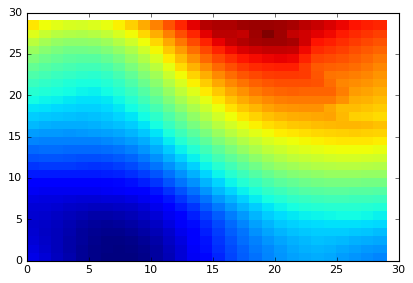

In [50]:
plt.pcolor(A)

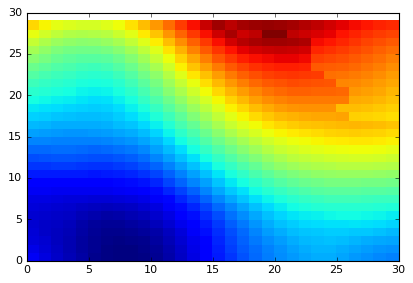

In [51]:
plt.pcolor(u_old)

In [52]:
xlong[1 , :, :].shape

(29, 29)

In [53]:
u[0, :, :, :].shape

(59, 29, 30)

In [54]:
u[0, :, :, :].shape

(59, 29, 30)

In [55]:
u_out = np.memmap('file_out',dtype='float32',mode='w+', shape= u[0,:, :, :].shape)

In [56]:
u_out.shape

(59, 29, 30)

In [57]:
np.zeros((2,3,4))

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

In [87]:
'''

    `XLON`, `XLAT`, ...  van con su dimensión temporal. 
    `U` no va con su dimensión temporal, sólo las dimensiones espaciales correspondientes a un tiempo.
    `ej: U[1, :, :, :]`

'''


def interpolate_velocity(XLONG, XLAT, XLONG_U, XLAT_U, U, u = True, Kind = 'linear'):
    
    x_old = XLONG_U[0, 1, :]
    y_old = XLAT_U[0, :, 1]
    x_new = XLONG[0, 1, :]
    y_new = XLAT[0, :, 1]
    
    if u == True:
        u_shape = (U.shape[0], U.shape[1], U.shape[2]-1)
    
    else:
        u_shape = (U.shape[0], U.shape[1] - 1, U.shape[2])
    
    
    U_out = np.zeros(u_shape, dtype='float32')
    #U_out = np.zeros(u_shape, dtype='float32')
    
    for h in range(0, U.shape[0]):
        
        f = interpolate.interp2d(x_old, y_old, U[h, :, :], kind = Kind)
        U_out[h, :, :] = f(x_new, y_new)

    return U_out

In [88]:
u_interpol = interpolate_velocity(xlong, xlat, xlong_u, xlat_u, u[0,:, :, :])

In [89]:
u_interpol.shape

(59, 29, 29)

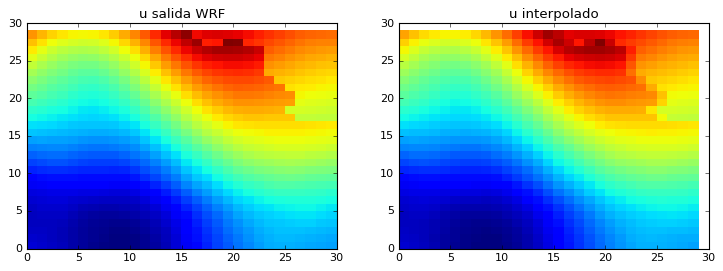

In [65]:
h = 57
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(221)
ax1.pcolor(u[0, h, :, :])
plt.title("u salida WRF")

ax2 = fig.add_subplot(222)
ax2.pcolor(u_interpol[h, :, :])
#ax2.title(title = 'u interpolado')
plt.title('u interpolado')


## Ahora para v

In [66]:
v = nc.variables['V']

In [67]:
v_interpol = interpolate_velocity(xlong, xlat, xlong_v, xlat_v, v[0,:,:,:], u = False)

In [68]:
import time

start = time.time()

interpolate_velocity(xlong, xlat, xlong_v, xlat_v, v[0,:,:,:], u = False)

end = time.time()
print(end - start, 'seg')

0.010328054428100586 seg


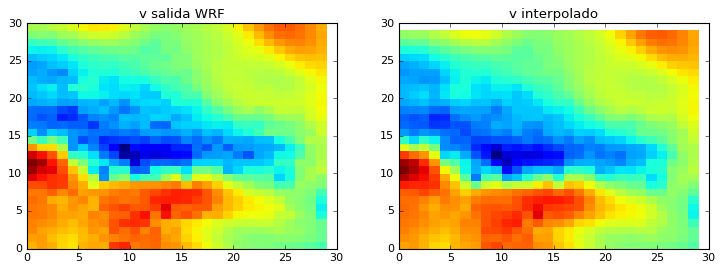

In [439]:
h = 0
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(221)
ax1.pcolor(v[0, h, :, :])
#Cs = plt.contour(relieve[1, :, :], colors= 'k')
#plt.clabel(Cs, fontsize = 8)
plt.title("v salida WRF")


ax2 = fig.add_subplot(222)
ax2.pcolor(v_interpol[h, :, :])
#Cs = plt.contour(relieve[1, :, :], colors= 'k')
#plt.clabel(Cs, fontsize = 8)
plt.title('v interpolado')

## Compute height

Según el [manual del usuario de WRF](http://mailman.ucar.edu/pipermail/wrf-users/2011/002437.html) muchas variables de salida del WRF se encuentran en medio de la rejilla vertical, es por eso que cuando se calcula la altura usando las variables `PH` y `PHB`, se obtiene un valor extra en la componente vertical que no tienen  las otras variables  como las velocidades `U` y `V`. 

In [80]:
'''
    compute_height(PH, PHB)
    
    PH y PHB deben ser prporcionados como una matriz de tres dimensiones es decir hay especificar su variable temporal. 
    Por ejemplo: Para el tiempo t = 0, se debe introducir PH[0, :, :, :] y PHB[0, :, :, :].
'''

def compute_height(PH, PBH):
    
    g = 9.8
    z_shape = (PH.shape[0]-1, PH.shape[1], PH.shape[2])
    Z = np.zeros(z_shape, dtype='float32')
    
    
    for h in range(0, PH.shape[0]-1):
        
        Z[h, :, :] = ((PH[h, :, :] + PBH[h, :, :]) + (PH[h+1, :, :] + PBH[h+1, :, :]))/g
        
    return Z    

In [81]:
Z = compute_height(PH[0, :, :, :], PHB[0, :, :, :])

In [83]:
PH.shape

(97, 60, 29, 29)

In [84]:
u.shape

(97, 59, 29, 30)

In [82]:
Z.shape

(59, 29, 29)

In [69]:
W = nc.variables['W']

In [71]:
U.shape

(97, 59, 29, 30)

## Richardson

In [443]:
np.memmap('file_out', dtype = 'float32', mode = 'w+', shape = (60, 29, 29))

memmap([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,

In [183]:
T[t, :, nx, ny]

array([  20.27879524,   20.2707119 ,   20.26575089,   20.2606163 ,
         20.30088615,   20.28860855,   20.27857399,   20.26806068,
         20.25396729,   20.24036598,   20.23473358,   20.23066521,
         20.22797012,   20.26298714,   20.33930779,   20.48678207,
         20.76085854,   21.12675095,   21.55642319,   22.26981544,
         23.33037949,   24.48614311,   25.60353088,   26.5751915 ,
         27.67900848,   29.45459175,   31.74157715,   33.96478653,
         36.16225815,   38.64590454,   41.22867584,   43.54503632,
         45.33924103,   46.52436447,   48.96331024,   52.9211731 ,
         55.52601242,   59.06628799,   64.10848999,   70.35124969,
         82.11265564,   99.83023071,  122.65380859,  150.61903381,
        180.24380493,  208.14932251,  230.18182373,  252.05807495,
        273.71258545,  297.75628662,  328.36846924,  360.07263184,
        392.3793335 ,  418.04412842,  443.23120117,  467.89477539,
        492.42660522,  516.90856934,  540.79016113], dtype=flo

In [188]:
Z[:, nx, ny][0]

6378.7563

In [137]:
def compute_Richardson(T_s, θ, Z, u, v):
    g = 9.8
    Ri = np.zeros(Z.shape, dtype='float32')
    
    for i in range(1,len(θ)-2):
        
        Vu = np.sqrt(u[i+1]**2 + v[i+1]**2)
        Vd = np.sqrt(u[i-1]**2 + v[i-1]**2)
        
        Ri[i] = 
        #Ri[i] = g / T_s * ((θ[i+1] - θ[i-1])*(Z[i+1] - Z[i-1]))/(Vu - Vd)**2
    
    return Ri

In [138]:
g = 9.8
T = nc.variables['T']
U = nc.variables['U']
V = nc.variables['V']
T2 = nc.variables['T2']
PH = nc.variables['PH']
PHB = nc.variables['PHB']

`u_interpol` sale de `u[0,:,:,:]`, es decir de `u` al tiempo cero.

In [113]:
len(T[t, :, nx, ny])

59

In [124]:
Z[:, nx, ny].shape[0] - 2

57

In [174]:
nx = 10
ny = nx
t = 0
Ri = compute_Richardson(T2[t, nx, ny], T[t, :, nx, ny], Z[:, nx, ny], u_interpol[:, nx, ny], v_interpol[:, nx, ny])

In [175]:
Ri

array([  0.00000000e+00,  -2.03772381e-01,  -1.32251367e-01,
         1.84557128e+00,   1.13594604e+00,  -2.20952347e-01,
        -2.61517078e-01,  -3.13277841e-01,  -2.53761411e-01,
        -1.92720488e-01,  -1.84448034e-01,  -2.17010468e-01,
         1.59917653e+00,   2.14732494e+01,   5.06427002e+02,
         4.05430260e+01,   8.42885208e+01,   1.71393109e+05,
         1.05319977e+02,   1.91204433e+01,   1.09750996e+01,
         1.76900959e+01,   2.21668381e+02,   5.93065338e+01,
         9.59991760e+01,   1.66017105e+02,   3.58302765e+01,
         5.72153854e+01,   1.45165649e+03,   1.72916052e+03,
         1.45916595e+02,   1.47865324e+01,   7.36985254e+00,
         1.47578934e+02,   1.64516869e+01,   8.99131680e+00,
         2.78700466e+01,   2.65095581e+03,   1.58720801e+04,
         9.62324121e+03,   2.05228052e+03,   6.40806787e+03,
         1.43805347e+03,   2.93243317e+02,   3.45768036e+02,
         1.09304062e+05,   3.57103546e+02,   1.96331116e+02,
         1.57833038e+02,

In [176]:
Ri.shape

(59,)

In [177]:
Z[1:58, nx, ny].shape

(57,)

In [178]:
Ri.shape

(59,)

In [179]:
Ri.max()

1027655.9

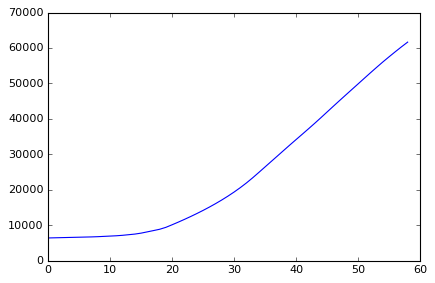

In [185]:
plt.plot(Z[:, nx, ny])

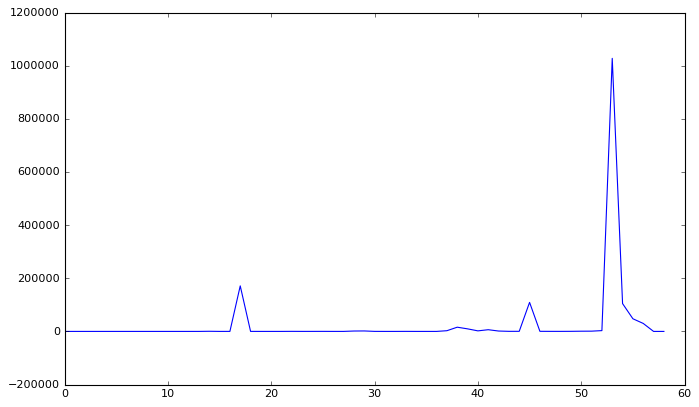

In [180]:
plt.figure(figsize=(10,6))
plt.plot(Ri)

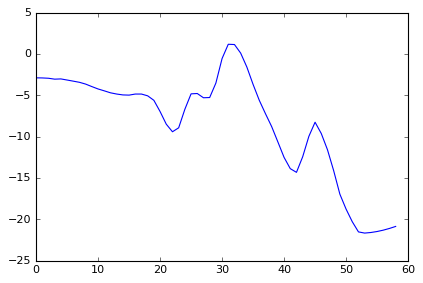

In [181]:
plt.plot(u_interpol[:, nx, ny])

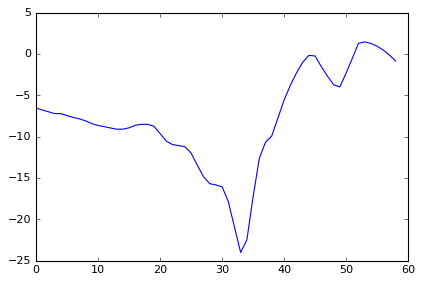

In [182]:
plt.plot(v_interpol[:, nx, ny])